# Group members
1. Ruslan Gokhman
2. Haider Ali

# Introduction

Sentiment analysis is a very popular technique that helps to detect underlying sentiment in a piece of text.

We can define text sentiment as postive, negative or neutral.

Many organizations rely on sentiment analysis algorithms to help them gauge the opinions of both existing and potential customers. It also relates  film industry companies.

We are going to define sentiment analysis of movie reviews.

Data resource: http://www.cs.cornell.edu/people/pabo/movie-review-data/


If we want to execute well done sentiment analysis we should provide next steps:


*   Import NLTK library
*   Word Tokenization
*   Removal of Punctuation
*   Removing Stopwords
*   Sentiment Analysis


# Data Preparation 

LIBRARY IMPORT

In [ ]:
import re
import nltk
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

# Fecthing the file names from the Github directory

In [ ]:
def get_names(url):
        
    result = requests.get(url)

    soup = BeautifulSoup(result.text, 'html.parser')
    txtfiles = soup.find_all(title=re.compile("\.txt"))

    filenames = []
    for fn in txtfiles:
            filenames.append(fn.extract().get_text())

    return filenames
# Github URL where Negative reviews are stored.
neg_url = 'https://github.com/AliHaider20/AIM-5001/tree/main/Movies%20Reviews%20Analysis/txt_sentoken/neg'  # Get Negative reviews file names
pos_url = 'https://github.com/AliHaider20/AIM-5001/tree/main/Movies%20Reviews%20Analysis/txt_sentoken/pos'  # Get Postive reviews file names

pos_files = get_names(pos_url)
neg_files = get_names(neg_url)
len(pos_files) + len(neg_files) # Check

2000

### Fetching the reviews from Github repository.

In [ ]:
# Fetching Positive reviews
pos_reviews=[]

for file in pos_files:
  req=requests.get(f'https://raw.githubusercontent.com/Gokhman07/AIM-5001/master/pos/{file}')
  pos_reviews.append([req.text, "Pos"])

# Fetching Negative reveiws

neg_reviews=[]

for file in neg_files:
  req=requests.get(f'https://raw.githubusercontent.com/Gokhman07/AIM-5001/master/neg/{file}')
  neg_reviews.append([req.text, "Neg"])

# Create dataframe that provides all movie reviews

In [ ]:
rev_df = pd.DataFrame(neg_reviews, columns = ["Review", "Sentiment"]).append(pd.DataFrame( pos_reviews, columns=['Review','Sentiment',]))
rev_df.reset_index(inplace=True)
rev_df.drop("index", axis=1, inplace=True)
rev_df.head()

,Review,Sentiment
0,"plot : two teen couples go to a church party ,...",Neg
1,the happy bastard's quick movie review \ndamn ...,Neg
2,it is movies like these that make a jaded movi...,Neg
3,""" quest for camelot "" is warner bros . ' firs...",Neg
4,synopsis : a mentally unstable man undergoing ...,Neg


In [ ]:
rev_df.tail()

,Review,Sentiment
1995,"[wow, movie, everything, movie, funny, dramati...",Pos
1996,"[richard, gere, commanding, actor, always, gre...",Pos
1997,"[glory, starring, matthew, broderick, denzel, ...",Pos
1998,"[steven, spielberg, second, epic, film, world,...",Pos
1999,"[truman, burbank, perfect, name, jim, carrey, ...",Pos


## DATA CLEANING: 

1.   Stop Words removal
2.   Punctuation Removal






In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
en_stops = stopwords.words('english')

## Part 1: Removing stop words and punctuation.

In [ ]:
def remove_stop_punc(sent):
    ''' 
    This function removes Englsih language stop words and punctuations from
    a provided list of reviews.
    '''

    # define a new list to store the words we will retain from the 'words' list
    words_clean = []
    words=word_tokenize(sent.lower())
    
    for word in words:

    #filter from stop words and punctuation
    #NLTK word tokenizer accepts '' as ``, but we do not need it also
        if word not in en_stops and word.isalpha():
            words_clean.append(word)
    return words_clean

In [ ]:
%%time
rev_df['Review']= rev_df['Review'].apply(remove_stop_punc)
rev_df.head()

CPU times: user 13.4 s, sys: 72.5 ms, total: 13.5 s
Wall time: 13.6 s


,Review,Sentiment
0,"[plot, two, teen, couples, go, church, party, ...",Neg
1,"[happy, bastard, quick, movie, review, damn, b...",Neg
2,"[movies, like, make, jaded, movie, viewer, tha...",Neg
3,"[quest, camelot, warner, bros, first, attempt,...",Neg
4,"[synopsis, mentally, unstable, man, undergoing...",Neg


In [ ]:
rev_df.tail()

,Review,Sentiment
1995,"[wow, movie, everything, movie, funny, dramati...",Pos
1996,"[richard, gere, commanding, actor, always, gre...",Pos
1997,"[glory, starring, matthew, broderick, denzel, ...",Pos
1998,"[steven, spielberg, second, epic, film, world,...",Pos
1999,"[truman, burbank, perfect, name, jim, carrey, ...",Pos


In [ ]:
corpus = rev_df.Review.explode(ignore_index=True)

In [ ]:
vals, counts  = np.unique(rev_df.Review[0], return_counts=True)

In [ ]:
all_files = []
all_files.extend(pos_files)
all_files.extend(neg_files)

In [ ]:
unique_words = np.unique(rev_df['Review'].explode(ignore_index=True))
TDM = pd.DataFrame(index = unique_words, columns = rev_df.index ).fillna(0)
TDM.fillna(0, inplace=True)

In [ ]:
TDM.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaahhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
%%time
for i,j in enumerate(rev_df.Review):
    vl_count=pd.Series(j).value_counts()

    TDM.loc[TDM.index.isin(list(vl_count.index)),TDM.columns[i]]= list(vl_count.values)

# TDM.drop(range(2000), axis=1, inplace=True)
TDM.head()

CPU times: user 9.03 s, sys: 41.3 ms, total: 9.07 s
Wall time: 9.07 s


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaahhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Sparsity of the Term Document matrix

In [ ]:
tdm = TDM.to_numpy()
sparsity = 1.0 - ( np.count_nonzero(tdm) / tdm.size)
sparsity

0.993218544965877

# Frequency of the top 30 words from the complete Document.


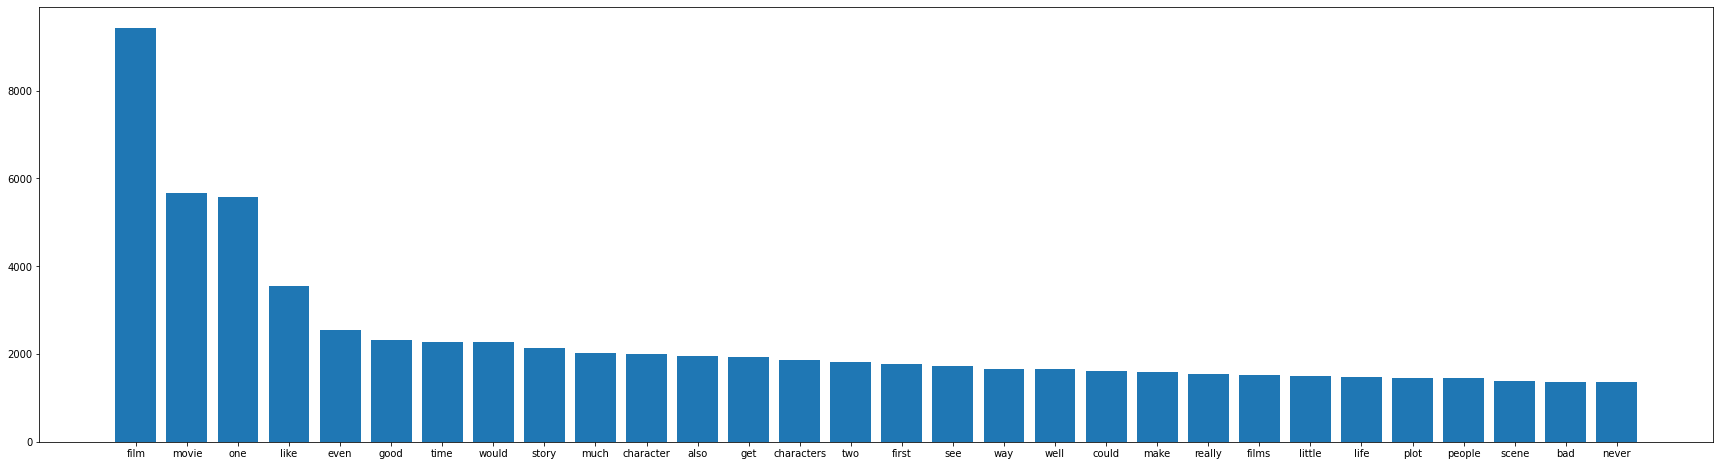

In [ ]:
from nltk import FreqDist
plt.figure(figsize=(30,8))

all_words_frequency = dict(FreqDist(corpus))
sorted_dict = dict(sorted(all_words_frequency.items(), key = lambda x:x[1], reverse=True))
plt.bar(list(sorted_dict.keys())[:30], list(sorted_dict.values())[:30])
plt.show()

# Frequency of the top 30 words which has Positive sentiments.

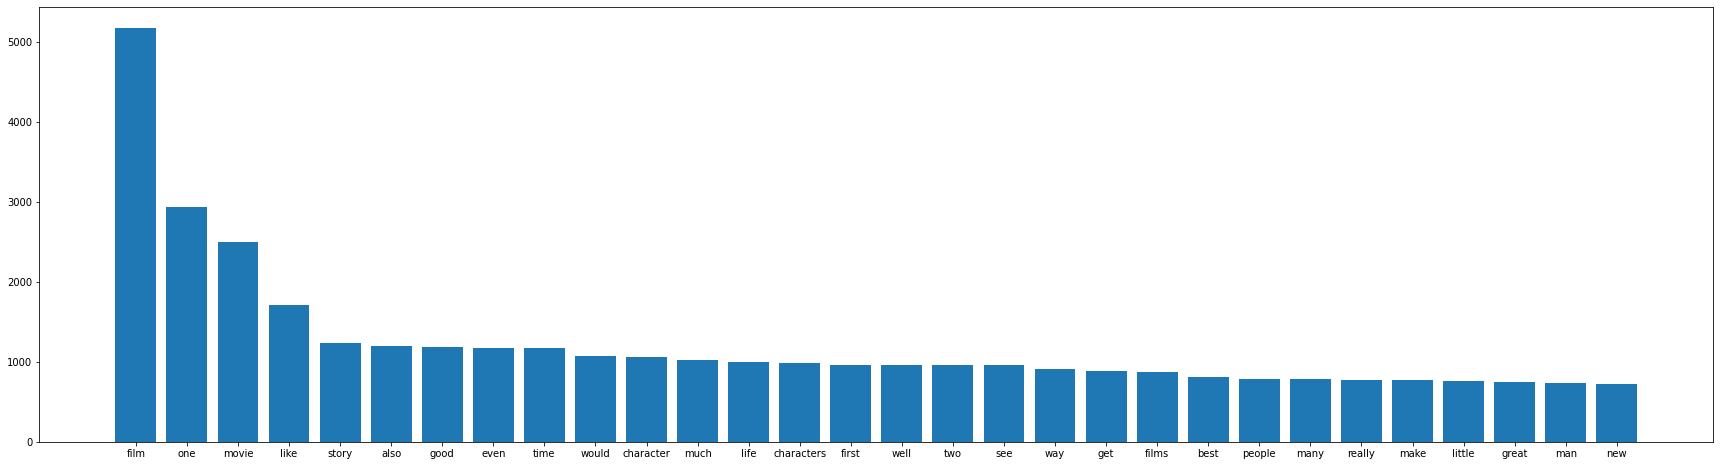

In [ ]:
plt.figure(figsize=(30,8))

pos_words_frequency = dict(FreqDist(rev_df[rev_df.Sentiment == "Pos"].Review.explode()))
sorted_dict = dict(sorted(pos_words_frequency.items(), key = lambda x:x[1], reverse=True))
plt.bar(list(sorted_dict.keys())[:30], list(sorted_dict.values())[:30])
plt.show()

# Frequency of the top 30 words which has Negative sentiments.

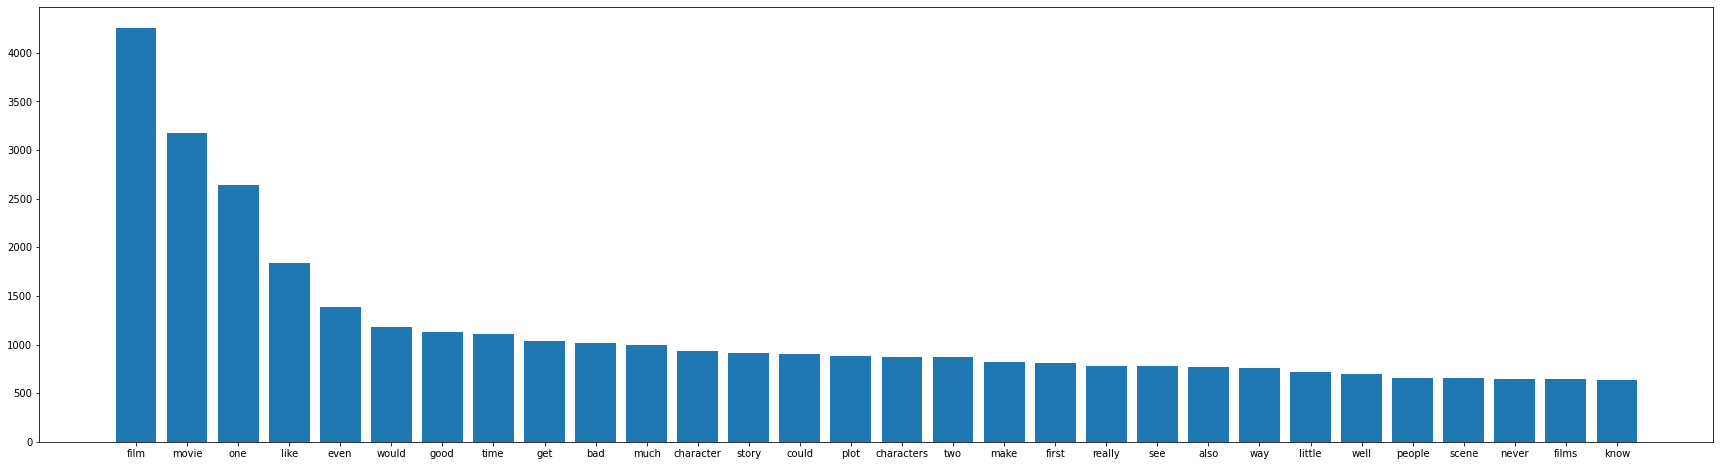

In [ ]:
plt.figure(figsize=(30,8))

neg_words_frequency = dict(FreqDist(rev_df[rev_df.Sentiment == "Neg"].Review.explode()))
sorted_dict = dict(sorted(neg_words_frequency.items(), key = lambda x:x[1], reverse=True))
plt.bar(list(sorted_dict.keys())[:30], list(sorted_dict.values())[:30])
plt.show()

# Splitting the TDM into Training, Testing, validation sets.

In [ ]:
def split_random(df, percent_train=70, percent_test=15):
    """
    Splits matrix data into randomly ordered sets 
    grouped by provided percentages.

    percent_validation 10
    training (80, 2)
    testing (10, 2)
    validation (10, 2)

    Returns:
    - training_data: percentage_train e.g. 70%
    - testing_data: percent_test e.g. 15%
    - validation_data: reminder from 100% e.g. 15%
    """

    percent_validation = 100 - percent_train - percent_test

    if percent_validation < 0:
        print("Make sure that the provided sum of " + \
        "training and testing percentages is equal, " + \
        "or less than 100%.")
        percent_validation = 0
    else:
        print("percent_validation", percent_validation)

    columns=df.shape[1]

    #shuffle by columns
    shuffled = df.sample(frac=1,axis=1)

    end_training = int(columns*percent_train/100)    
    end_testing = end_training + int((columns * percent_test/100))

    training = shuffled.iloc[:,:end_training]
    testing = shuffled.iloc[:,end_training:]
    return training, testing


training, testing = split_random(TDM, percent_train=75, percent_test=25) 

print("Training",training.shape)
print("Testing",testing.shape)

percent_validation 0
Training (37951, 1500)
Testing (37951, 500)


TRAINING DATASET 

In [ ]:
training.head()

,1315,1090,1601,481,574,1238,1645,1156,1384,1694,...,32,1491,1456,439,1896,878,207,373,1751,958
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaahhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TEST DATASET

In [ ]:
testing.head()

,1663,1490,1736,757,1211,667,1886,598,1629,398,...,1690,798,685,770,1990,1258,1296,1996,1222,1883
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaahhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Define quantity of positive and negative reviews 
are contained within each subset

Quantity of positive and negative reviews in trainig dataset

In [ ]:
rev_df.index.isin(list(training.columns))

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
result1=rev_df['Sentiment'][rev_df.index.isin(list(training.columns))].value_counts()
result1

Pos    756
Neg    744
Name: Sentiment, dtype: int64

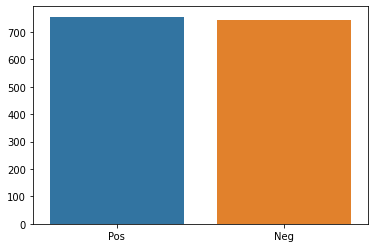

In [ ]:
sns.barplot(x=result1.index,y=result1.values)

Quantity of positive and negative reviews in testing dataset

In [ ]:
result2=rev_df['Sentiment'][rev_df.index.isin(list(testing.columns))].value_counts()
result2

Neg    256
Pos    244
Name: Sentiment, dtype: int64

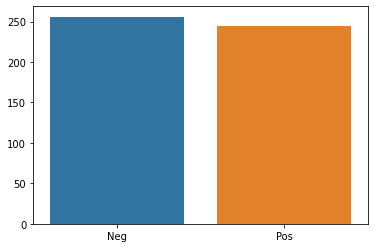

In [ ]:
sns.barplot(x=result2.index,y=result2.values)

In training and testing datasets We have almost the same size of positive and negatives samples in our dataset, hence we can say that our subsets are balanced
